# Load Prediction - Explore Data Analysis

-- Buraya proje ile ilgili bilgiler ve kişisel bilgiler gelecek. --

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_columns = df.columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID gereksiz bir attribute, diğer attribute'lerde null ve NaN değerler bulunuyor bunları temizlemek veya düzeltmek gerekiyor.

In [6]:
df = df.drop(columns=['Loan_ID'])

In [7]:
df.sample(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
583,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural,N


Bir kişinin Cinsiyeti, medeni durumu, bağlılıkları (?), eğitim durumu ve diğer bilgiler doğrultusunda bu kişinin `maaş durumu`'nu tahmin etmemiz gerekiyor.

Object olan attribute'leri düzelterek direkt olarak basit bir tf modeline sokarsak ne gibi bir sonuç elde ederiz?

In [8]:
df['Credit_History'] = df['Credit_History'].astype('O')

In [9]:
df['Credit_History'].unique()

array([1.0, 0.0, nan], dtype=object)

In [10]:
def plot_feature(feature):
    plt.figure(figsize=(6,6))
    sns.countplot(df[feature]);

/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/red/.local/lib/pyth

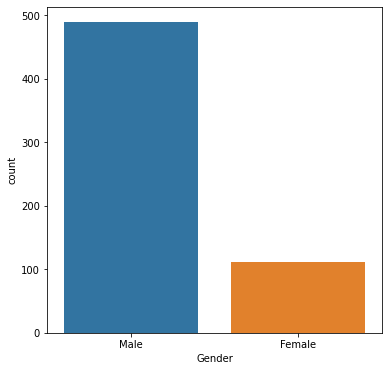

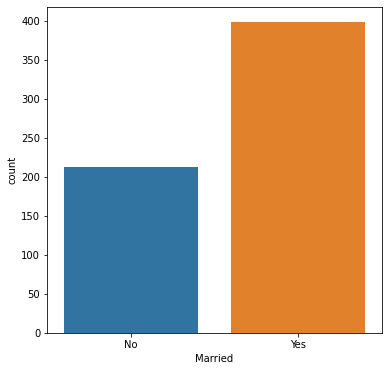

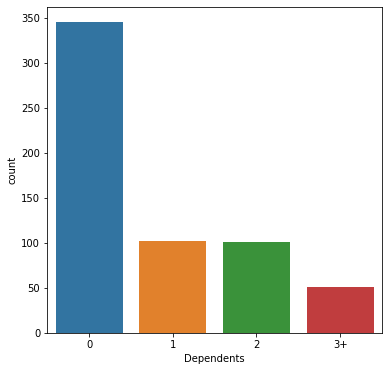

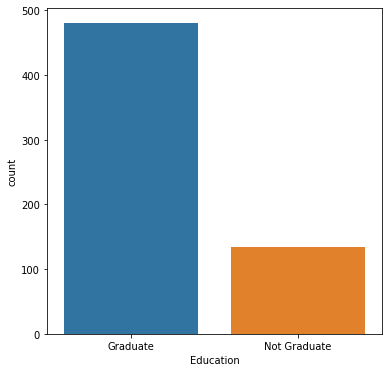

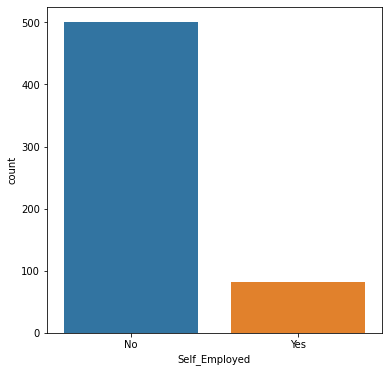

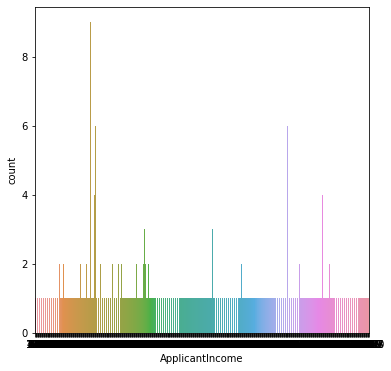

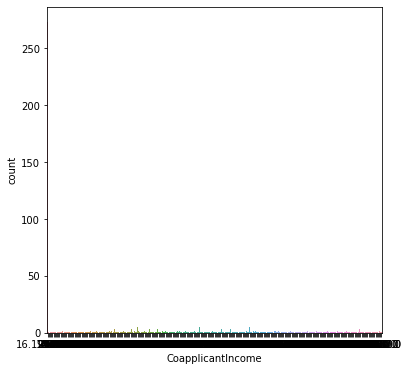

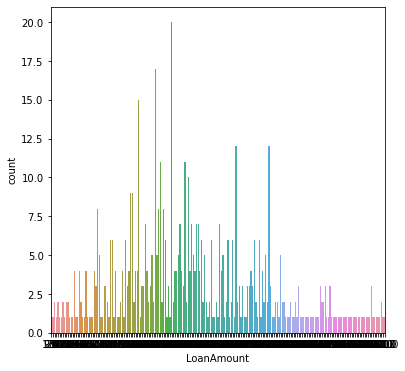

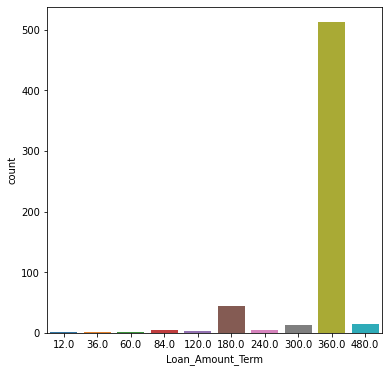

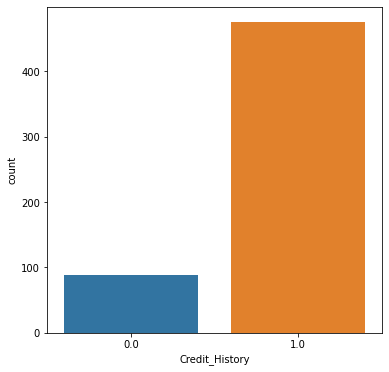

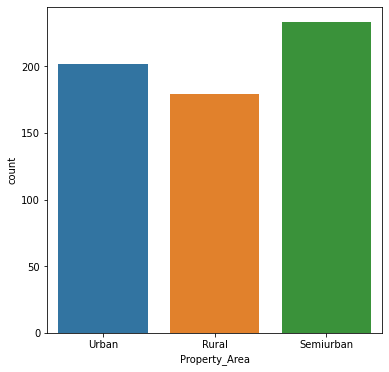

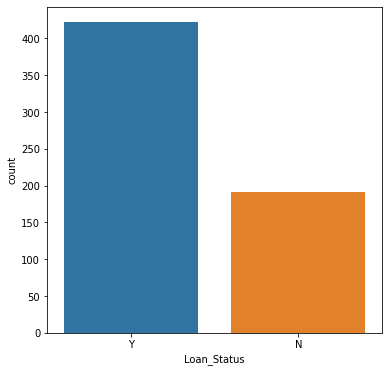

In [11]:
for colmn in df.columns:
    plot_feature(colmn)

* Erkeklerin loan'ı daha fazla
* Evlilerin loan'ı daha fazla
* Bağımlılıkların sayısı ile loan zıt oranda artıp azalıyor
* Mezunların loan'ı diğerlerine göre daha fazla
* Kendi işi olmayanların loan'ı olanlara göre daha fazla
* Nerede oturduklarının dağılımı loan üzerinde pek etkili değil gibi gözüküyor.

In [12]:
def grid_plot(feature):
    grid = sns.FacetGrid(df, col='Loan_Status', height=4, aspect=2)
    grid.map(sns.countplot, feature);

/home/red/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/red/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/red/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/red/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/red/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  war

[None, None, None, None, None, None, None, None, None, None, None, None]

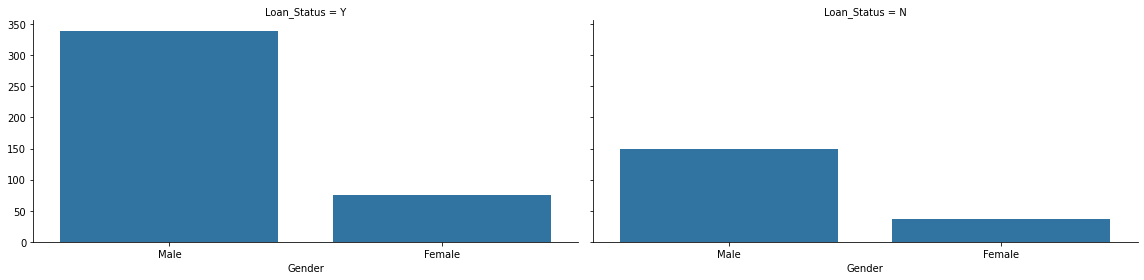

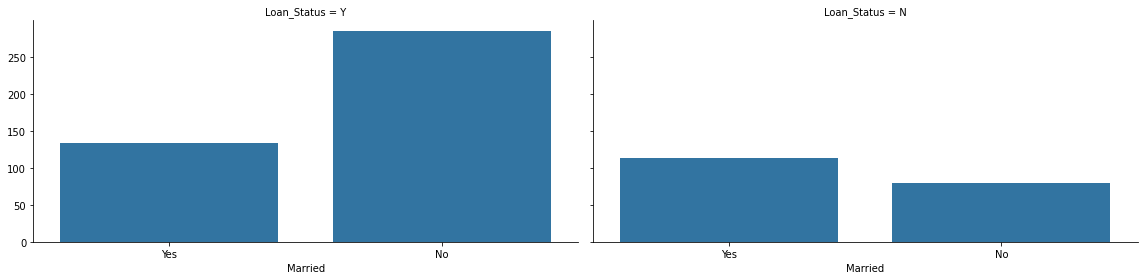

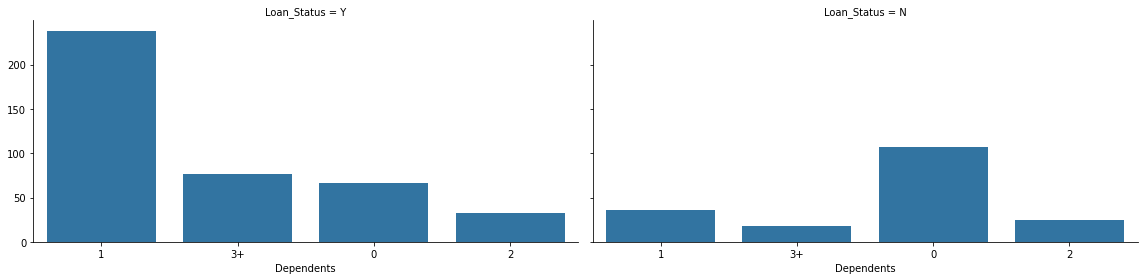

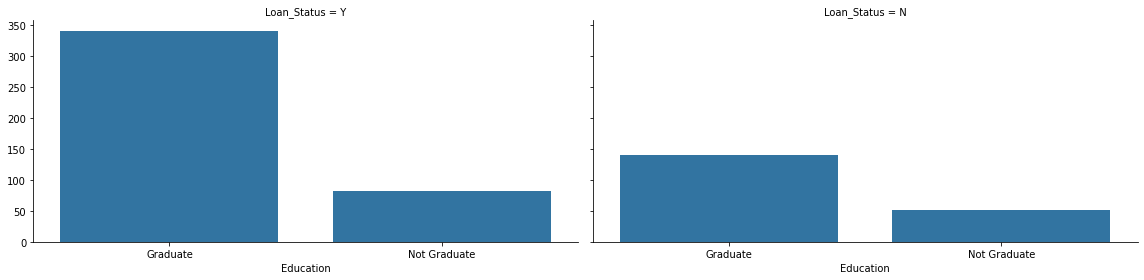

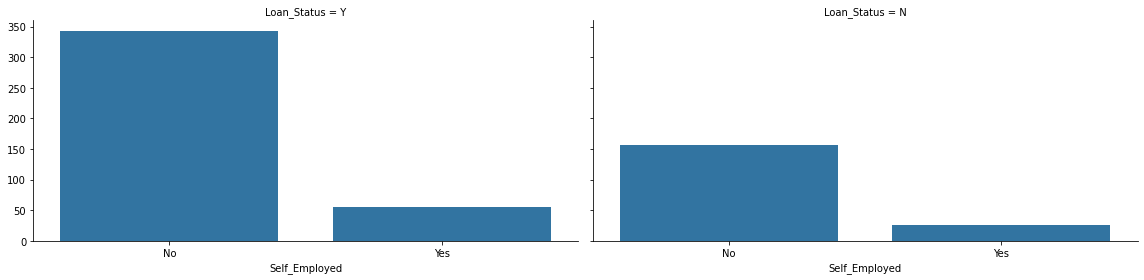

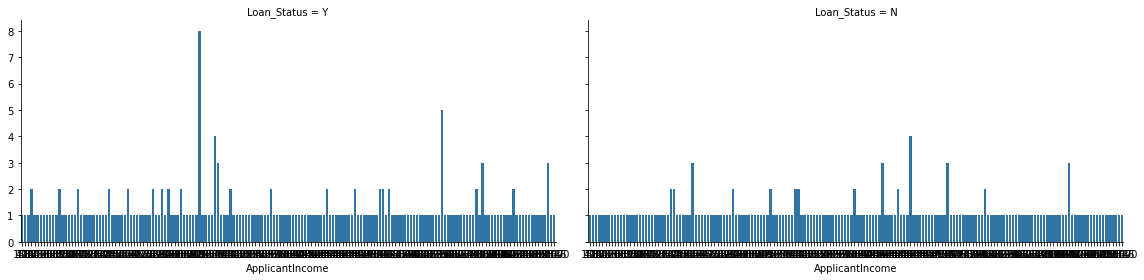

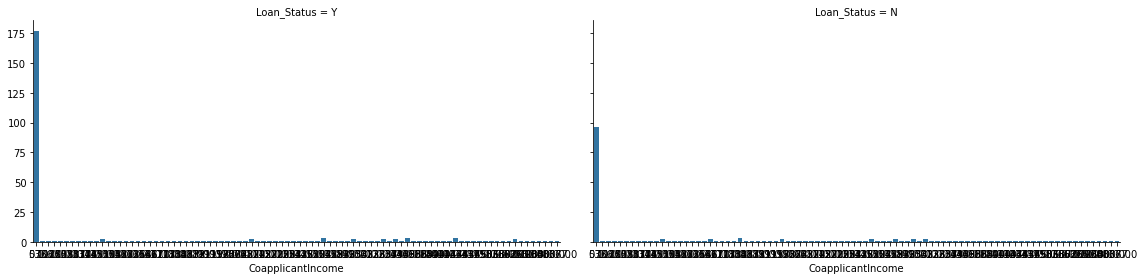

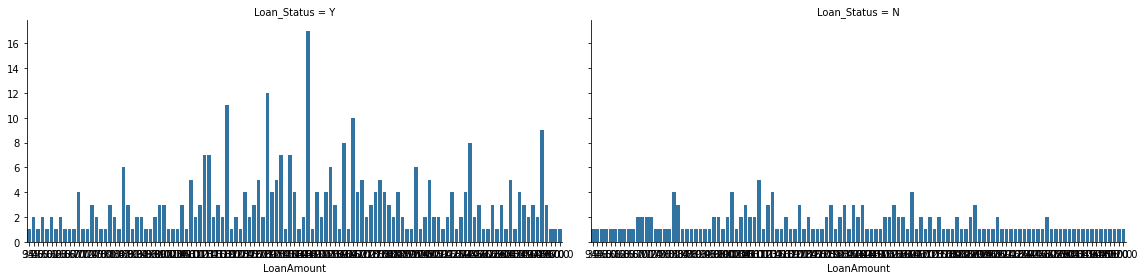

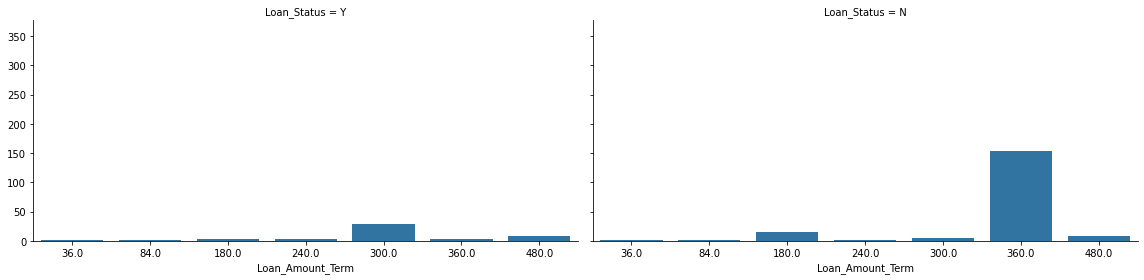

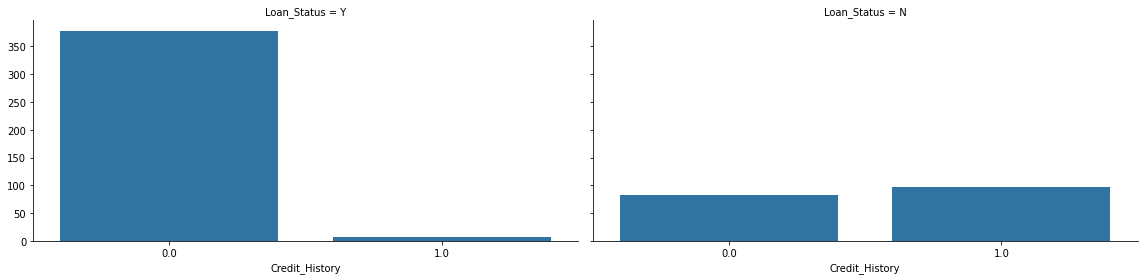

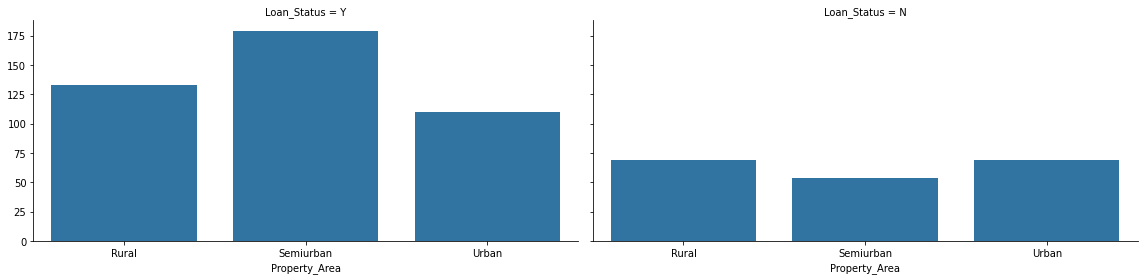

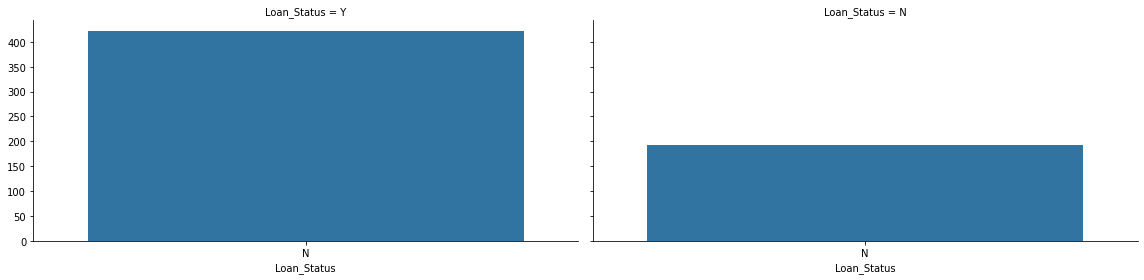

In [13]:
[grid_plot(x) for x in df.columns]

Grafikleri daha geniş gördüğümüzde yukarıdaki bazı çıkarımların yanlış olduğunu görüyoruz.

In [14]:
df.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


## Kayıp/Eksik veriler

In [15]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
categorical_data = []
numerical_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        categorical_data.append(df.iloc[:, i])
    else:
        numerical_data.append(df.iloc[:, i])

In [17]:
categorical_data = pd.DataFrame(categorical_data).transpose()
numerical_data = pd.DataFrame(numerical_data).transpose()

In [18]:
categorical_data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
130,Male,No,0,Graduate,Yes,NaN,Urban,Y
444,Male,Yes,0,Graduate,No,NaN,Rural,Y
608,Male,Yes,0,Graduate,No,1.0,Rural,Y
477,NaN,Yes,2,Graduate,No,0.0,Semiurban,N
6,Male,Yes,0,Not Graduate,No,1.0,Urban,Y


In [19]:
numerical_data.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
411,6256.0,0.0,160.0,360.0
165,3707.0,3166.0,182.0,NaN
373,3062.0,1987.0,111.0,180.0
368,6325.0,0.0,175.0,360.0
133,3459.0,0.0,25.0,120.0


In [20]:
categorical_data = categorical_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
categorical_data.isnull().any()

# Her kategoriye ait en çok rastlanan değerleri değeri bulunmayan satırlara ekledik.

Gender            False
Married           False
Dependents        False
Education         False
Self_Employed     False
Credit_History    False
Property_Area     False
Loan_Status       False
dtype: bool

In [21]:
numerical_data.fillna(method='bfill', inplace=True)
numerical_data.isnull().any()

# Her kategoriye ait boş olan satırların bir önceki değeri yerleştirildi.

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
dtype: bool

### Categorical veriyi numerik veriye çevirme işlemi

In [22]:
lab_enc = LabelEncoder()

target_values = {'Y': 0, 'N': 1}

In [23]:
target = categorical_data['Loan_Status']
categorical_data.drop('Loan_Status', axis=1, inplace=True)

In [24]:
target = target.map(target_values)

In [26]:
for i in categorical_data:
    categorical_data[i] = lab_enc.fit_transform(categorical_data[i])

In [28]:
target.sample()

399    1
Name: Loan_Status, dtype: int64

In [29]:
categorical_data.sample()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
542,0,0,1,0,0,1,1


In [30]:
df = pd.concat([categorical_data, numerical_data, target], axis=1)

In [31]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
102,1,1,0,0,0,1,2,13650.0,0.0,160.0,360.0,0
69,0,0,0,0,0,0,1,4300.0,0.0,136.0,360.0,1
575,1,1,2,0,0,1,2,3159.0,461.0,108.0,84.0,0
459,1,1,0,0,0,1,1,8334.0,0.0,160.0,360.0,1
366,1,0,0,0,0,1,1,2500.0,0.0,96.0,480.0,1


## Train 

In [32]:
X = pd.concat([categorical_data, numerical_data], axis=1)
y = target

In [34]:
X.shape

(614, 11)

In [35]:
y.shape

(614,)

In [37]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=25)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

In [38]:
X_train.shape

(460, 11)

In [39]:
y_train.shape

(460,)

## Tensorflow section

In [40]:
import tensorflow as tf

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),    
])

In [42]:
model.compile(optimizer='Adam', metrics=['acc'], loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
hist = model.fit(X_train, y_train, epochs=5000, batch_size=512, shuffle=True)

Epoch 1/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5669 - acc: 0.6587
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.9450 - acc: 0.6891
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9304 - acc: 0.4978
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0758 - acc: 0.6826
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5836 - acc: 0.7000
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8647 - acc: 0.6174
Epoch 7/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.8787 - acc: 0.5761
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3541 - acc: 0.6674
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4649 - acc: 0.6761
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8789 - acc: 0.6326
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - lo

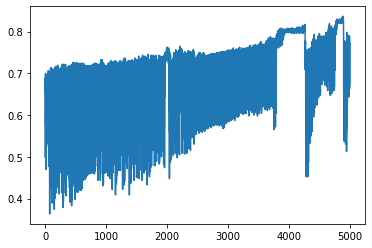

In [47]:
plt.plot(hist.history['acc'])

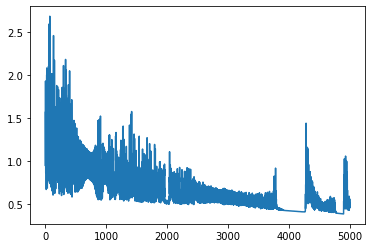

In [48]:
plt.plot(hist.history['loss'])

In [52]:
test_hist = model.predict(X_test)

In [60]:
for i in range(len(test_hist)):
    if test_hist[i] > 0.5:
        test_hist[i] = 1
    else:
        test_hist[i] = 0

In [61]:
test_hist

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [83]:
y_test

214    0
98     0
262    1
475    0
206    0
      ..
3      0
88     0
103    0
18     1
227    0
Name: Loan_Status, Length: 154, dtype: int64

In [84]:
test_hist

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],